In [1]:
!pip install wget

In [2]:
!git clone https://github.com/WongKinYiu/yolov7 
!cd yolov7 && curl -L -o yolov7.pt https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt
!cd yolov7 && curl -L -o yolov7-e6e.pt https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-e6e.pt

Cloning into 'yolov7'...
remote: Enumerating objects: 1191, done.
remote: Total 1191 (delta 0), reused 0 (delta 0), pack-reused 1191
Receiving objects: 100% (1191/1191), 74.23 MiB | 6.45 MiB/s, done.
Resolving deltas: 100% (513/513), done.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 72.0M  100 72.0M    0     0  7822k      0  0:00:09  0:00:09 --:--:-- 10.3M   0  7107k      0  0:00:10  0:00:07  0:00:03 9115k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  290M  100  290M    0     0  8729k      0  0:00:34  0:00:34 --:--:-- 9492k  0     0  8668k      0  0:00:34  0:00:31  0:00:03 7640k


In [3]:
import numpy as np
import pandas as pd
from glob import glob
import shutil
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold
from tqdm.notebook import tqdm
import seaborn as sns
import cv2
from os.path import isfile, join
from IPython.display import Image, clear_output
import subprocess
import torch

In [4]:
import os
import shutil

# Define the source and destination paths
tpath0 = '/Users/shrestabanerjee/Desktop/count/archive-2/Crowd-UIT/Video/8.mp4'
destination_dir = '/Users/shrestabanerjee/Desktop/count/sample'

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Copy the file
shutil.copy(tpath0, os.path.join(destination_dir, '8.mp4'))


'/Users/shrestabanerjee/Desktop/count/sample/8.mp4'

In [5]:
print(os.listdir('/Users/shrestabanerjee/Desktop/count'))
print(os.listdir('/Users/shrestabanerjee/Desktop/count/sample'))

['sample2', 'yolov7', '.DS_Store', 'count.ipynb', 'archive-2', 'sample', 'yolo_4.mp4', '.ipynb_checkpoints', '8.mp4']
['4.mp4', '8.mp4']


In [6]:
os.chdir('/Users/shrestabanerjee/Desktop/count/yolov7')

In [7]:
!python3 detect.py --weights yolov7-e6e.pt --img 640 --conf 0.001 --source ../sample --save-txt --save-conf 

Namespace(weights=['yolov7-e6e.pt'], source='../sample', img_size=640, conf_thres=0.001, iou_thres=0.45, device='', view_img=False, save_txt=True, save_conf=True, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-126-g84932d7 torch 2.0.1 CPU

Fusing layers... 
Model Summary: 792 layers, 151687420 parameters, 817020 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
video 1/2 (1/750) /Users/shrestabanerjee/Desktop/count/yolov7/../sample/4.mp4: 123 persons,

In [8]:
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 50  # Set a larger limit (e.g., 50 MB)


In [9]:
def create_animation(ims):
    fig=plt.figure(figsize=(16,10))
    plt.axis('off')
    im=plt.imshow(cv2.cvtColor(ims[0],cv2.COLOR_BGR2RGB))
    plt.close
    
    def animate_func(i):
        im.set_array(cv2.cvtColor(ims[i],cv2.COLOR_BGR2RGB))
        return [im]

    return animation.FuncAnimation(fig, animate_func, frames=len(ims), interval=1000//5)

In [10]:
!ls /Users/shrestabanerjee/Desktop/count/yolov7/runs/detect

exp  exp2 exp3


In [20]:
!ls /Users/shrestabanerjee/Desktop/count/yolov7/runs/detect/exp3

4.mp4  8.mp4  labels


In [21]:
!ls /Users/shrestabanerjee/Desktop/count/yolov7/runs/detect/exp3/labels

4_1.txt   4_226.txt 4_353.txt 4_480.txt 4_607.txt 4_734.txt 8_186.txt 8_312.txt
4_10.txt  4_227.txt 4_354.txt 4_481.txt 4_608.txt 4_735.txt 8_187.txt 8_313.txt
4_100.txt 4_228.txt 4_355.txt 4_482.txt 4_609.txt 4_736.txt 8_188.txt 8_314.txt
4_101.txt 4_229.txt 4_356.txt 4_483.txt 4_61.txt  4_737.txt 8_189.txt 8_315.txt
4_102.txt 4_23.txt  4_357.txt 4_484.txt 4_610.txt 4_738.txt 8_19.txt  8_316.txt
4_103.txt 4_230.txt 4_358.txt 4_485.txt 4_611.txt 4_739.txt 8_190.txt 8_317.txt
4_104.txt 4_231.txt 4_359.txt 4_486.txt 4_612.txt 4_74.txt  8_191.txt 8_318.txt
4_105.txt 4_232.txt 4_36.txt  4_487.txt 4_613.txt 4_740.txt 8_192.txt 8_319.txt
4_106.txt 4_233.txt 4_360.txt 4_488.txt 4_614.txt 4_741.txt 8_193.txt 8_32.txt
4_107.txt 4_234.txt 4_361.txt 4_489.txt 4_615.txt 4_742.txt 8_194.txt 8_320.txt
4_108.txt 4_235.txt 4_362.txt 4_49.txt  4_616.txt 4_743.txt 8_195.txt 8_321.txt
4_109.txt 4_236.txt 4_363.txt 4_490.txt 4_617.txt 4_744.txt 8_196.txt 8_322.txt
4_11.txt  4_237.txt 4_364.txt 4_491.txt 4

In [46]:
import cv2
import os

def video_2_frames(video_file='/Users/shrestabanerjee/Desktop/count/yolov7/runs/detect/exp3/4.mp4', image_dir='/Users/shrestabanerjee/Desktop/count/sample2', image_file='img_%s.png'):
    i = 0
    cap = cv2.VideoCapture(video_file)

    # Check if the video file opened successfully
    if not cap.isOpened():
        print("Error: Could not open video file.")
        return

    # Create the output image directory if it doesn't exist
    os.makedirs(image_dir, exist_ok=True)

    while cap.isOpened():
        flag, frame = cap.read()
        if not flag:
            break
        cv2.imwrite(os.path.join(image_dir, image_file % str(i).zfill(6)), frame)
        i += 1

    cap.release()
    cv2.destroyAllWindows()

video_2_frames()


In [47]:
print(os.listdir('/Users/shrestabanerjee/Desktop/count/sample2')[0:5])

['img_000499.png', 'img_000300.png', 'img_000466.png', 'img_000472.png', 'img_000314.png']


In [48]:
paths0=[]
for file in os.listdir('/Users/shrestabanerjee/Desktop/count/sample2'):
    paths0+=[os.path.join('/Users/shrestabanerjee/Desktop/count/sample2',file)]
paths0[0:5]

['/Users/shrestabanerjee/Desktop/count/sample2/img_000499.png',
 '/Users/shrestabanerjee/Desktop/count/sample2/img_000300.png',
 '/Users/shrestabanerjee/Desktop/count/sample2/img_000466.png',
 '/Users/shrestabanerjee/Desktop/count/sample2/img_000472.png',
 '/Users/shrestabanerjee/Desktop/count/sample2/img_000314.png']

In [49]:
paths1=[]
for item in paths0:
    if item[-4:]=='.png':
        paths1+=[item]

In [50]:
print(paths1[0])

/Users/shrestabanerjee/Desktop/count/sample2/img_000499.png


In [51]:
order=[]
for item in paths1:
    order+=[int(item[:-4].split('_')[-1])]
paths2=pd.DataFrame(paths1)
paths2[1]=order
paths2.columns=['path','int']
paths2=paths2.sort_values('int')
paths3=paths2['path'].tolist()
paths3[0:5]

['/Users/shrestabanerjee/Desktop/count/sample2/img_000000.png',
 '/Users/shrestabanerjee/Desktop/count/sample2/img_000001.png',
 '/Users/shrestabanerjee/Desktop/count/sample2/img_000002.png',
 '/Users/shrestabanerjee/Desktop/count/sample2/img_000003.png',
 '/Users/shrestabanerjee/Desktop/count/sample2/img_000004.png']

In [52]:
images0=[]
for i in tqdm(range(0,len(paths3),1)):
    images0+=[cv2.imread(paths3[i])]

  0%|          | 0/750 [00:00<?, ?it/s]

In [53]:
from matplotlib import animation
def create_animation(ims):
    fig=plt.figure(figsize=(16,8))
    plt.axis('off')
    im=plt.imshow(cv2.cvtColor(ims[0],cv2.COLOR_BGR2RGB))
    
    def animate_func(i):
        im.set_array(cv2.cvtColor(ims[i],cv2.COLOR_BGR2RGB))
        return [im]

    return animation.FuncAnimation(fig, animate_func, frames=len(ims), interval=1000//10)

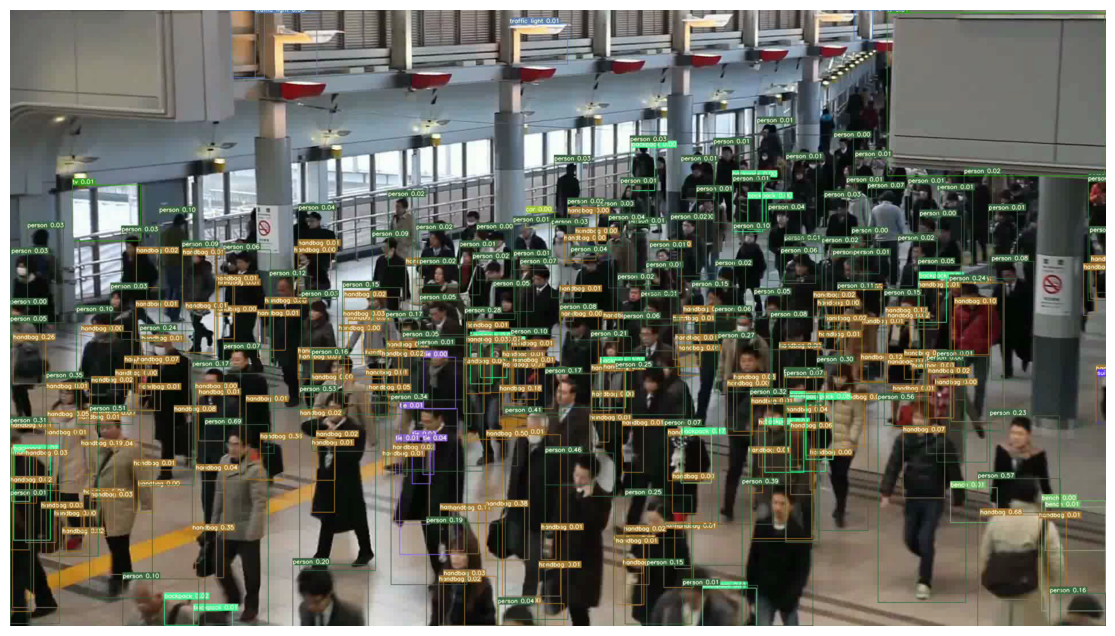

In [54]:
create_animation(np.array(images0))

In [55]:
img1 = cv2.imread(paths3[0]) 
Y1, X1, channels1 = img1.shape
frame_rate1 = 24
print(img1.shape)

(1080, 1920, 3)


In [ ]:
fourcc = cv2.VideoWriter_fourcc('m','p','4','v') 
video0 = cv2.VideoWriter('../yolo_4.mp4',fourcc,frame_rate1,(X1,Y1))

for item in paths3:
    img1 = cv2.imread(item)
    img1 = cv2.resize(img1,(X1,Y1) ) 
    video0.write(img1)

video0.release()

In [ ]:
os.chdir('/Users/shrestabanerjee/Desktop/count')

In [ ]:
#!rm -rf sample
#!rm -rf sample2

In [ ]:
!ls

In [ ]:
txt_dir='/Users/shrestabanerjee/Desktop/count/yolov7/runs/detect/exp3/labels'
txtpaths=[]
texts=os.listdir(txt_dir)
for item in texts:
    txtpaths+=[os.path.join(txt_dir,item)]

In [ ]:
boxdata=[]
boxfile=[]
for i in range(len(txtpaths)):
    file=txtpaths[i]
    boxdata+=[np.loadtxt(file)]     
    boxfile+=[file[0:-4].split('/')[-1]]
print(boxdata[0:6])
print(boxfile[0:6])

BOX=pd.DataFrame()

for i in range(len(boxdata)):
    if type(boxdata[i][0])==np.float64:
        add=pd.DataFrame([boxdata[i]])
        add[6]=boxfile[i]
        BOX=pd.concat([BOX,add])
    else:
        add=pd.DataFrame(boxdata[i])
        add[6]=boxfile[i]
        #display(add)
        BOX=pd.concat([BOX,add])       

BOX2=BOX.reset_index(drop=True)
BOX2[0:10]

In [ ]:
BOX2.columns=['class','x','y','w','h','confidence','file']
BOX2['order']=BOX2['file'].apply(lambda x:('0000'+x.split('_')[-1])[-4:])
#BOX2['time']=BOX2['order'].apply(lambda x:int(x)*30/750)
data0=BOX2.sort_values('order',ascending=True)
display(data0)


In [ ]:
#YOLOv7 CLASSES
CLASSES = [
"person", "bicycle", "car", "motorcycle", "airplane", 
"bus", "train", "truck", "boat", "traffic light", 
"fire hydrant", "stop sign", "parking meter", "bench", 
"bird", "cat", "dog", "horse", "sheep", "cow", 
"elephant", "bear", "zebra", "giraffe", "backpack", 
"umbrella", "handbag", "tie", "suitcase", "frisbee", 
"skis", "snowboard", "sports ball", "kite", "baseball bat", 
"baseball glove", "skateboard", "surfboard", 
"tennis racket", "bottle", "wine glass", "cup", "fork", 
"knife", "spoon", "bowl", "banana", "apple", 
"sandwich", "orange", "broccoli", "car|rot", "hot dog", 
"pizza", "donut", "cake", "chair", "couch", 
"potted plant", "bed", "dining table", "toilet", "tv", 
"laptop", "mouse", "remote", "keyboard", 
"cell phone", "microwave", "oven", "toaster", "sink", 
"refrigerator", "book", "clock", "vase", "scissors", 
"teddy bear", "hair drier", "toothbrush"]

In [ ]:
data0['class'].value_counts()

In [ ]:
for i in range(len(CLASSES)):
    if CLASSES[i]=="person":
        person_num=i
        break
print(person_num)

In [ ]:
print(len(data0[data0['class']==person_num]))

In [ ]:
data0=data0[data0['confidence']>0.001][data0['class']==0]
data0=data0.reset_index(drop=True)
display(data0)

In [ ]:
data1=data0[['order']].copy()
data1['count']=1
data2=data1.groupby('order',as_index=False).sum()
display(data2)

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
fig=make_subplots(specs=[[{"secondary_y":False}]])
fig.add_trace(go.Scatter(x=data2['order'],y=data2['count'],name='person'),secondary_y=False,)
fig.update_layout(autosize=False,width=700,height=500,title_text="Number of people detected")
fig.update_xaxes(title_text="order")
fig.update_yaxes(title_text="People Number",secondary_y=False)
fig.show()

In [ ]:
image_dir='/Users/shrestabanerjee/Desktop/count/sample2'
def view(order):
    file='img_00'+order+'.png'
    path=os.path.join(image_dir,file)
    img=cv2.imread(path)
    plt.figure(figsize=(12,18))
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.show()

In [ ]:
view('0156')

In [ ]:
import cv2
import numpy as np

# Load YOLO
net = cv2.dnn.readNet("/Users/shrestabanerjee/Desktop/count/yolov4.weights", "/Users/shrestabanerjee/Desktop/Lane Detection/yolov4.cfg")

# Load COCO names
with open("/Users/shrestabanerjee/Desktop/Lane Detection/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Load video
video_capture = cv2.VideoCapture("/Users/shrestabanerjee/Downloads/1330080540287 RTO BAg-out.mp4")

# Initialize an area counter
total_area = 0

while video_capture.isOpened():
    ret, frame = video_capture.read()

    if not ret:
        break

    height, width, _ = frame.shape

    # Perform object detection
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(net.getUnconnectedOutLayersNames())

    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([x, y, w, h])

    # Calculate the area of detected objects (you need to convert to real-world measurements)
    for i in range(len(boxes)):
        label = str(classes[class_ids[i]])
        if label in ["person", "car"]:
            x, y, w, h = boxes[i]
            object_area = w * h
            total_area += object_area

# Release the video capture
video_capture.release()

print(f"Total area covered by the camera: {total_area} square units")
